<a href="https://colab.research.google.com/github/Pratye/Techfest-WeldRight/blob/main/Techfest-WeldRight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import *

In [ ]:
df = pd.read_excel('/content/WeldRight Dataset.xlsx')

In [ ]:
# Remove extra columns
df = df[['Employee Code', 'Machine', 'Production', 'Order Operation No', 'Date',
       'Time', 'Current', 'Humidity', 'Temperature', 'Flow', 'Job Temp',
       'Voltage', 'Defect']] 
df = df.iloc[1:, :] #drop first row which has info about columns
df.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:28:527,1.13,74,23,0.01,29.3,15.2,No Defect
2,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:40,1.82,74,23,0,29.3,0,Tungsten Inclusion
3,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:29:677,2.91,74,23,0,29.3,0,No Defect
4,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:166,0.04,74,23,0,29.3,0,No Defect
5,382617,TWLD23,E15002965,240,2022-09-10 00:00:00,7:32:30:696,2.51,74,23,0,27.8,0,No Defect


In [ ]:
df.describe()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
count,827534,827534,549354,827534,827534,827534,827531.00,827534,827534,827534.0,827534.0,827534.0,827534
unique,9,1,18,9,24,821555,6818.00,53,23,1009.0,1173.0,12624.0,52
top,391342,TWLD23,Test coopan,240,2022-09-14 00:00:00,14:22:47:641,10.11,78,24,0.0,31.2,0.0,No Defect
freq,256884,827534,71734,491470,91059,3,10184.00,78463,359642,257174.0,62292.0,578018.0,819552


In [ ]:
df = df[['Current', 'Humidity', 'Temperature', 'Flow', 'Job Temp','Voltage', 'Defect']]
df.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,1.13,74,23,0.01,29.3,15.2,No Defect
2,1.82,74,23,0,29.3,0,Tungsten Inclusion
3,2.91,74,23,0,29.3,0,No Defect
4,0.04,74,23,0,29.3,0,No Defect
5,2.51,74,23,0,27.8,0,No Defect


In [ ]:
df1 = df.drop(['Defect'], axis=1)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = preprocessing.RobustScaler()
scaled = scaler.fit_transform(df1)
scaled = pd.DataFrame(scaled,columns = df1.columns)
scaled.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage
0,-0.083458,-0.285714,-1.0,-0.506369,-0.344828,1.755196
1,-0.032042,-0.285714,-1.0,-0.509554,-0.344828,0.000000
2,0.049180,-0.285714,-1.0,-0.509554,-0.344828,0.000000
3,-0.164680,-0.285714,-1.0,-0.509554,-0.344828,0.000000
4,0.019374,-0.285714,-1.0,-0.509554,-0.603448,0.000000


In [ ]:
l = df['Defect'].unique()

In [ ]:
dic = {}
for i in l:
  if 'No' in i:
    dic.update({i:0})
  else:
    dic.update({i:1})

In [ ]:
df['Defect'] = df['Defect'].map(dic)
df['Defect'].value_counts()

0    821781
1      5753
Name: Defect, dtype: int64

In [ ]:
scaled['Defect'] = df['Defect']

In [ ]:
from sklearn.utils import resample
df_majority = scaled[scaled.Defect==0]
df_minority = scaled[scaled.Defect!=0]
df_minority
 
#Downsample majority class
df_majority_downsampled = resample(df_majority,replace=False,n_samples=5753,random_state=123) 
 
dataset1 = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
print(dataset1.Defect.value_counts())
dataset1

0.0    5753
1.0    5753
Name: Defect, dtype: int64


,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
352088,1.000745,0.000000,1.0,0.621019,-0.310345,0.000000,0.0
544489,-0.307004,-0.142857,-1.0,-0.509554,0.224138,0.000000,0.0
814032,-0.233979,-1.000000,1.0,-0.490446,0.155172,0.000000,0.0
615607,1.511177,0.428571,-1.0,-0.509554,0.603448,0.995727,0.0
52825,0.160209,0.857143,0.0,-0.509554,-0.379310,0.000000,0.0
...,...,...,...,...,...,...,...
827014,2.071535,-2.714286,0.0,-0.509554,1.551724,1.245381,1.0
827125,-0.070045,-2.714286,0.0,-0.506369,1.948276,0.000000,1.0
827233,1.436662,-2.714286,0.0,-0.509554,1.224138,1.418014,1.0
827234,0.365127,-2.714286,0.0,-0.509554,1.224138,1.376328,1.0


In [ ]:
Y = dataset1['Defect']
X = dataset1.drop(['Defect'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
dataset=pd.concat([X_train,y_train ], axis=1, sort=False)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [ ]:
kfold = StratifiedKFold(n_splits=5)
random_state = 17
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, 
                                      scoring = "f1", cv = kfold, n_jobs=-1))

In [ ]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


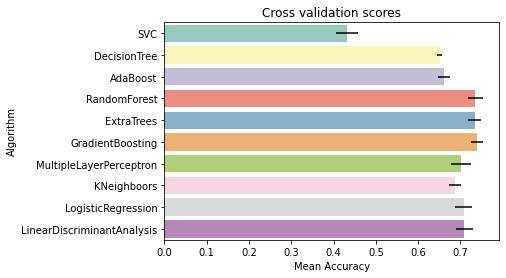

In [ ]:
import seaborn as sns
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
model1=GradientBoostingClassifier(n_estimators=200000,max_depth=4,learning_rate=0.01)
model1.fit(X_train,y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_estimators": [100,200,300,500],
          "max_depth": [None],
          "learning_rate": [1, 0.1, 0.01, 0.001]
}
model2=GradientBoostingClassifier()

gsas = GridSearchCV(model2, params, cv = 5, verbose = 1,scoring="f1", n_jobs= 4)
gsas.fit(X_train,y_train)
gsas.best_score_